# Métodos de Clustering

# Introduction

El clustering (agrupación) es una de las formas más utilizadas de aprendizaje no supervisado. 
- Descubre automáticamente la agrupación natural en los datos.
- Es especialmente útil para explorar los datos de los que no sabe nada.
- Puede encontrar conexiones en las que nunca hubiera pensado.
- También puede ser útil como un tipo de ingeniería de características, donde los ejemplos existentes y nuevos se pueden asignar y etiquetar como pertenecientes a uno de los grupos identificados en los datos.

Algunas aplicaciones típicas en el mundo real incluyen detección de fraude, categorizar libros en una biblioteca o segmentación de clientes en marketing.

## Tabla de contenido

1. [Tipos de algoritmos de agrupación](#1)
2. [Configuración](#2)
3. [Determinar el número óptimo de grupos](#3)
4. [K-means](#4)
5. [Agrupación jerárquica](#5)
6. [Algoritmo de agrupación DBSCAN](#6)
7. [Modelos de mezcla gaussiana (GMM)](#7)
8. [Comparación de todos los algoritmos](#8)

# 1. Tipos de algoritmos de clustering  <a class="anchor" id="1"></a>

Hay muchos algoritmos de clustering para elegir. 
- Es una buena idea explorar una gama de algoritmos y diferentes configuraciones. 
- Puede tomar algún tiempo descubrir qué tipo de algoritmo funciona mejor para los datos dados, pero cuando lo haga, obtendrá una visión invaluable de esos datos.

**Centroide**

Estos tipos de algoritmos separan los puntos de datos basados ​​en múltiples centroides en los datos. 
- Cada punto de datos se asigna a un clúster basado en su distancia cuadrada desde el centroide.
- Este es el tipo de clustering más utilizado.
- El algoritmo K-Means es uno de los algoritmos de clustering basados ​​en centroides.Aquí K es el número de grupos y es un hiperparámetro para el algoritmo.

**Basados en jerárquico (basado en conectividad)**

La idea se basa en la idea de que los objetos están más relacionados con los objetos cercanos que con los objetos más alejados. 
- Construye un árbol de grupos para que todo esté organizado de arriba a abajo.
- Inicialmente, cada punto de datos se considera como un clúster individual.
- En cada iteración, los grupos similares se fusionan con otros grupos hasta que se forman un clúster o k clústeres.

**Basados en densidad**

Los datos se agrupan por áreas de altas concentraciones de puntos de datos rodeados de áreas de bajas concentraciones de puntos.
- Básicamente, el algoritmo encuentra los lugares densos  y les llama clústeres.
- Los grupos pueden ser de cualquier forma.
- No estás limitado a las condiciones esperadas.
- Los algoritmos de clustering de este tipo no intentan asignar valores atípicos (outliers) a los grupos (son ignorados).

**Basados en distribución**

Es un modelo de clustering en el que se ajustan los datos sobre la probabilidad de que pueda pertenecer a la misma distribución.
- Hay un punto central establecido.
- A medida que aumenta la distancia de un punto de datos desde el centro, la probabilidad de que sea parte de ese clúster disminuye. 
- Este modelo funciona bien en datos sintéticos y grupos de tamaño diversa. 
- El método sufre de sobreajuste, a menos que se coloquen restricciones en la complejidad del modelo.
- Un modelo más complejo generalmente podrá explicar mejor los datos, lo que hace que la elección de la complejidad del modelo apropiada sea inherentemente difícil.

# 2. Configuración  <a class="anchor" id="2"></a>

### 2. 1 Data sets

Se usarán 7 datasets Seis para visualizaciones de ejercicios y una para resolver problemas de datos reales.

Conjunto de datos reales: OnlineRetail.zip

### 2.2 Importar librerias

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

%matplotlib inline

### 2.3 Import Data

In [ ]:
blob_df = pd.read_csv("../../../data/data-clustering/blob.csv")
dart_df = pd.read_csv("../../../data/data-clustering/dart.csv")
outliers_df = pd.read_csv("../../../data/data-clustering/outliers.csv")
spiral2_df = pd.read_csv("../../../data/data-clustering/spiral2.csv")
basic2_df = pd.read_csv("../../../data/data-clustering/basic2.csv")
boxes3_df = pd.read_csv("../../../data/data-clustering/boxes3.csv")

raw_df = pd.read_csv("../../../data/data-clustering/OnlineRetail.csv.zip", encoding= 'unicode_escape')

### 2.4 Visualizaciones

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(13,13))
fig.suptitle('EXERCISE DATA SETS\n', size = 18)

axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Blob");

axes[0,1].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap = "Set3")
axes[0,1].set_title("Dart");

axes[0,2].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap = "Set3")
axes[0,2].set_title("Basic");

axes[1,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Outliers");

axes[1,1].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap = "Set3")
axes[1,1].set_title("Spiral");

axes[1,2].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap = "Set3")
axes[1,2].set_title("Boxes");

plt.tight_layout()

### 2.5 Feature engineering

Los datos de la vida real necesitan cierta preparación antes del clustering.

In [ ]:
raw_df.describe(include='all')

In [ ]:
# eliminar columnas
raw_df.drop(['StockCode', 'InvoiceDate','Description','Country'],axis = 1, inplace =True)

In [ ]:
print(raw_df["Quantity"].min())
print(raw_df["UnitPrice"].min())

Los valores negativos probablemente significan que hubo retornos. Este es un factor importante para el comercio electrónico, pero para este estudio mantenemos solo las transacciones sin retorno (nuestro objetivo es introducir y comparar diferentes métodos de agrupación).

In [ ]:
df = raw_df.loc[raw_df["Quantity"] >0 ]
df = df.loc[df["UnitPrice"] >0 ]

In [ ]:
print(df["Quantity"].min())
print(df["UnitPrice"].min())

In [ ]:
# creando una nueva columna con la cantidad total
df["Total"]=df["Quantity"]*df["UnitPrice"]

In [ ]:
# elimianr 'Quantity' y 'UnitPrice'
df.drop(['Quantity', 'UnitPrice'],axis = 1, inplace =True)

In [ ]:
# Verificar de datos para los valores faltantes
df.isnull().sum()

In [ ]:
# Eliminar valores faltantes en CustomerID.
df.dropna(axis = 0, inplace=True)

**Creación de nuevas características:**

1. Frequency: número total de transacciones

2. Amount: Cantidad total de transacciones

In [ ]:
#Amount
Amount = df.groupby('CustomerID')['Total'].sum()
Amount = Amount.reset_index()
Amount.columns=['CustomerID','Amount']

#frequency
Frequency=df.groupby('CustomerID')['InvoiceNo'].count()
Frequency=Frequency.reset_index()
Frequency.columns=['CustomerID','Frequency']

# fusionar ambos DF
df1 = pd.merge(Amount, Frequency, on='CustomerID', how='inner')
df1.head()

In [ ]:
# eliminar  'CustomerID'
df1.drop(['CustomerID'],axis = 1, inplace =True)

### 2.6 Detección de atípicos

In [ ]:
df1.describe(include='all')

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=df1['Amount'], palette='Spectral').set_title("Amount")
sns.boxplot(ax=axes[1], data=df1['Frequency'], palette='Spectral').set_title("Frequency")

plt.tight_layout()

Parece que tenemos un problema significativo con los valores atípicos.

#### Selección del modelo de detección de atípicos
* La distribución no es normal
* La distribución es muy sesgada
* Tenemos un cantidad inmensa de valores atípicos

El bosque de aislamiento (Isolation Forest) no asume una distribución normal y es capaz de detectar valores atípicos a un nivel multidimensional.
- también es computacionalmente eficiente.
- el algoritmo se basa en el principio de que las anomalías son observaciones que son pocas y diferentes, esto debería hacer que sean más fáciles de identificar.Por eso elijo el bosque de aislamiento.

In [ ]:
from sklearn.ensemble import IsolationForest
df2 = df1.copy()

In [ ]:
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1), max_features=1.0)
model.fit(df2)

In [ ]:
# Agregar columnas 'puntajes' y 'anomalías' a DF
scores = model.decision_function(df2)
anomaly = model.predict(df2)

df2['scores'] = scores
df2['anomaly'] = anomaly

anomaly = df2.loc[df2['anomaly'] == -1]
anomaly_index = list(anomaly.index)
print('El número total de outliers es:', len(anomaly))

In [ ]:
# eliminar outliers
df2 = df2.drop(anomaly_index, axis = 0).reset_index(drop=True)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=df2['Amount'], palette='Spectral').set_title("Amount")
sns.boxplot(ax=axes[1], data=df2['Frequency'], palette='Spectral').set_title("Frequency")

plt.tight_layout()

¡Podemos ver que el algoritmo de bosque de aislamiento hizo un buen trabajo!

In [ ]:
# eliminar columnas que ya no necesitamos
df2.drop(['scores', 'anomaly'], axis = 1, inplace =True)

### 2.7 Escalar datos

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3=scaler.fit_transform(df2)

# 3. Determinar el número óptimo de grupos  <a class="anchor" id="3"></a>

Seleccionar un número óptimo de grupos es clave para aplicar el algoritmo de agrupación al conjunto de datos, como la agrupación de K-Means, que requiere que el usuario especifique el número de grupos K para generar.
- Este es un procedimiento algo arbitrario, uno de los aspectos más débiles del análisis de clúster.
- La principal diferencia entre **codo (elbow)** y **método de silueta (silhouette )** es que el codo solo calcula la distancia euclidiana, mientras que la silueta tiene en cuenta variables como varianza, asimetría, diferencias altas, etc. 
- Tanto el método del codo / gráfico SSE, como el método de silueta se pueden usar indistintamente en función de los detalles presentados por las parcelas.

### 3.1 Método del codo

El método del codo es una heurística utilizada para determinar el número de grupos en un conjunto de datos. 
- El método consiste en trazar la variación explicada en función del número de grupos y elegir el codo de la curva como el número de grupos para usar.
- Es una representación gráfica para encontrar la 'k' óptima en una agrupación de k-means.
- Funciona al encontrar WCSS (Within-Cluster Sum of Square), es decir, la suma de la distancia cuadrada entre puntos en un clúster y el centroide de clúster.

El número óptimo de grupos se puede definir de la siguiente manera:

- Computar el algoritmo de agrupación (por ejemplo, agrupamiento de K-means) para diferentes valores de k. 
    - Por ejemplo, variando K de 1 a 10 grupos.
- Para cada k, calcular la suma total dentro del grupo de cuadrado (WSS).
- Trazar la curva de WSS de acuerdo con el número de grupos k.
- La ubicación de una curva (rodilla [knee]) en la gráfica generalmente se considera como un indicador del número apropiado de grupos.

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('El método del Codo')
plt.xlabel('Número de grupos')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# ! pip install yellowbrick

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Yellowbrick extiende la API Scikit-Learn para facilitar la selección del modelo y el ajuste del hiperparameter.

model = KMeans()
# K es un rango de número de grupos.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(df3)        # Ajustar datos al visualizador
visualizer.show()        # Finalizar y renderizar figura

### 3.2 Método de silueta (Silhouette Score)

El enfoque promedio de la silueta mide la calidad **de una agrupación**. 
- Es decir, determina qué tan bien se encuentra cada objeto dentro de su clúster.Un ancho de silueta promedio alto indica una buena agrupación.
- El número óptimo de grupos K es el que maximiza la silueta promedio en un rango de valores posibles para K (Kaufman y Rousseeuw 1990).

El algoritmo se puede calcular de la siguiente manera:

- Computar el algoritmo de agrupación (por ejemplo, agrupamiento de K-means) para diferentes valores de k.
- Para cada k, calcule la silueta promedio de observaciones (AVG.SIL).
- Traza la curva de avg.sil según el número de grupos k.
- La ubicación del máximo se considera el número apropiado de grupos.

La puntuación de la silueta están en el rango [-1, 1].
- El puntaje de silueta de 1 significa que los grupos son muy densos y están bien separados.
- La puntuación de 0 significa que los grupos se superponen.
- La puntuación de menos de 0 significa que los datos que pertenecen a los grupos pueden ser incorrectos/incorrectos.

In [ ]:
from sklearn import datasets
from sklearn.metrics import silhouette_score

# Instanciar los KMeans para 5 clústeres
km = KMeans(n_clusters=5, random_state=42)
# Ajustar Kmeans
km.fit_predict(df3)
# Calcular la puntuación de la silueta
score = silhouette_score(df3, km.labels_, metric='euclidean')
print('Silhouetter Average Score: %.3f' % score)

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Yellowbrick extiende la API Scikit-Learn para facilitar la selección del modelo y el ajuste del hiperparameter.
# código para simplemente crear visualización de silueta para grupos K-means con n_cluster = 2, 3, 4, 5, 6, 7.

fig, ax = plt.subplots(3, 2, figsize=(13,8))
fig.suptitle('Silhouette Analysis for 2-7 Clusters', size = 18)
plt.tight_layout()

for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df3)

La elección aquí no es tan obvia debido a las siguientes razones:

1. Presencia de grupos con puntajes de silueta inferior al promedio para grupos 5-7.
2. Fluctuaciones amplias en el tamaño de las figuras de silueta.
3. La fluctuación de tamaño no es similar, pero es mejor para 6 y 7 grupos.
4. El grosor de la gráfica de silueta que representa cada grupo también es un punto decisivo.
    - Desafortunadamente, tenemos un clúster que es significativamente más grueso que los demás.

### 3.3 Dendrograma

Esta técnica es específica del método jerárquico aglomerativo.
- El método comienza considerando cada punto como un clúster separado y comienza a unir puntos a grupos de manera jerárquica basada en sus distancias.
- Para obtener el número óptimo de grupos para la agrupación jerárquica, usamos un dendrograma que es un gráfico en forma de árbol que muestra las secuencias de fusiones o divisiones de grupos.

In [ ]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(df3, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

# 4. K-Means  <a class="anchor" id="4"></a>

K-means puede que sea el algoritmo de agrupamiento más conocido e implica asignar muestras a grupos en un esfuerzo por minimizar la varianza dentro de cada clúster.
- Es un algoritmo basado en centroides y el algoritmo de aprendizaje sin supervisión más simple.
- El algoritmo intenta minimizar la varianza de los puntos de datos dentro de un clúster.

**K-means++** (parámetro de inicio predeterminado para k-means en sklearn) es el algoritmo que se utiliza para superar el inconveniente planteado por el algoritmo K-means.
- El objetivo es extender el centroide inicial asignando el primer centroide al azar y luego seleccionando el resto de los centroides en función de la distancia cuadrada máxima.
- La idea es empujar los centroides lo más lejos posible el uno del otro.

Aunque la inicialización en K-means++ es computacionalmente más costosa que el estándar de K-Means, el tiempo de ejecución para la convergencia a la óptima se reduce drásticamente.
- Esto se debe a que los centroides que se eligen inicialmente es probable que ya se encuentren en diferentes grupos.

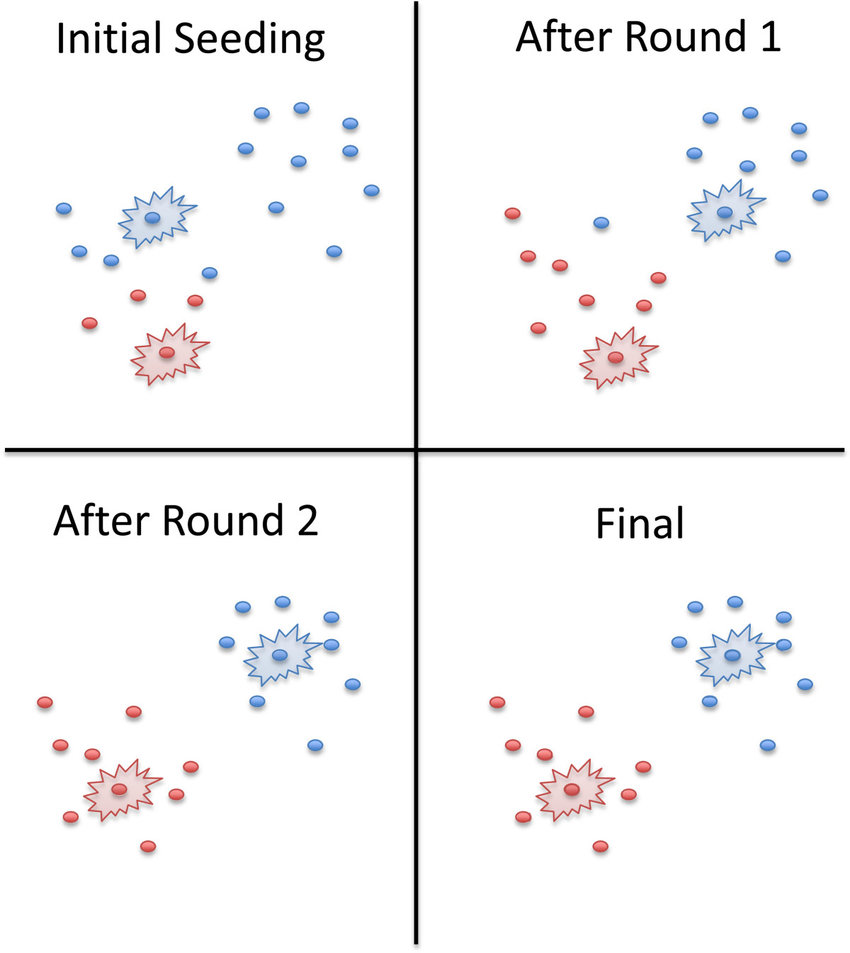

### 4.1 Ventajas y desventajas

**Ventajas:**

1. **Simple** - Es fácil de implementar

2. **Alto rendimiento** - es rápida y eficiente en términos de su costo computacional

4. **Fácil de interpretar** - Devuelve clústeres que se pueden interpretar y visualizar fácilmente

5. **Adecuado para grandes conjuntos de datos** Si bien se sabe que los algoritmos de agrupamiento son relativamente lentos, el algoritmo K-Means es relativamente rápido, por eso es efectivo para grandes conjuntos de datos.


**Desventajas:**

1. **Asume la densidad esférica** - Esto significa que no funciona tan bien en situaciones en las que los grupos tienen formas irregulares naturalmente. Esta es una suposición relativamente estricta.

2. **Sensible a la escala** - Si una de las variables está en una escala mucho mayor que las otras, esa variable tendrá un efecto descomunal en la distancia calculada. Esto significa que generalmente necesitamos volver a escalar datos antes de usar K-means.

3. **Difícil de incorporar variables categóricas** - está intencionado para cuando todas las características son numéricas. Hay formas en que puede adaptar los datos para que sean adecuados si tiene algunas características categóricas, pero en general la mayoría de sus características debe ser numérica.

4. **Sensible a los valores atípicos** - no tiene un método de detección de atípicos. Los centroides pueden ser arrastrados por valores atípicos, o los valores atípicos pueden obtener su propio clúster en lugar de ser ignorados. 

5. **Sensibilidad de inicialización** - es sensible a las condiciones iniciales que se utilizan para inicializar el algoritmo, como la elección de semillas o el orden de los puntos de datos. Si tenemos mala suerte con una opción de puntos de partida, los grupos producidos pueden ser arbitrariamente malos. Esto se soluciona con la variante K-Means++.

6. **Tener que elegir el número de grupos** - La agrupación requiere especificar el número de grupos que se crearán con anticipación. Elegir el valor correcto de 'K' es un problema de selección de modelos desafiante.

7. **Luchas con datos de alta dimensión** - El algoritmo depende de la distancia euclidiana, que es bastante mala en altas dimensiones. Si tenemos muchas características potenciales, debemos considerar aplicar la selección de características o los algoritmos de reducción de dimensionalidad a los datos antes de crear grupos.

8. **El algoritmo es aleatorio**, lo que significa que podemos ejecutarlo en el mismo conjunto de datos varias veces y obtener diferentes respuestas. Este es un gran problema para muchas aplicaciones.

9. **Los medios k solo pueden separar los grupos que son más o menos linealmente separables**: si los grupos se basan en la distancia al origen, K-means no podrá identificarlos.Podemos arreglarlo cambiando a coordenadas polares.

**Las formas de evitar el problema de la sensibilidad de inicialización en el algoritmo de K-means:**

1. **Repetir K-means** - El algoritmo es ejecutado repetidamente. Los centroides se inicializan y los clústeres se forman para dar como resultado una menor distancia intra-clúster y una distancia entre clúster más grande.

2. **K-Means++ ** - Una técnica de inicialización centralide inteligente. Solo un centroide se inicializa al azar, y se eligen otros centroides de manera que estén muy lejos de los centroides iniciales.Esto da como resultado una convergencia más rápida y una menor posibilidad de que el centroide se inicialice mal. Init predeterminado para Sklearn.

K Medias ++ proporciona resultados relativamente mejores.

### 4.2 Variaciones de K-means

** Algunas de las variaciones del algoritmo K-means: **

1. **K-Medians Clustering** - usa la mediana en cada dimensión (en lugar de la media).

2. **K-medoids (particionamiento alrededor de los medoides)** - usa medoides en lugar de media, y minimiza la suma de distancias para las funciones de distancia arbitraria.

3. **Agrupación de medias C difusas**- Una versión suave de K-means, donde cada punto de datos tiene un grado difuso de pertenencia a cada clúster.

4. **K-means++** - Algoritmo estándar de K-Means con una inicialización más inteligente de los centroides (inicio predeterminado para sklearn).

### 4.3 Entrenando el modelo K-Means

In [ ]:
# copiar data sets
df_kmeans = df3.copy()
df_blob_kmeans = blob_df.copy()
df_dart_kmeans = dart_df.copy()
df_basic_kmeans = basic2_df.copy()
df_outliers_kmeans = outliers_df.copy()
df_spiral2_kmeans = spiral2_df.copy()
df_boxes3_kmeans = boxes3_df.copy()

In [ ]:
df_blob_kmeans.drop(['color'], axis = 1, inplace =True)
df_dart_kmeans.drop(['color'], axis = 1, inplace =True)
df_basic_kmeans.drop(['color'], axis = 1, inplace =True)
df_outliers_kmeans.drop(['color'], axis = 1, inplace =True)
df_spiral2_kmeans.drop(['color'], axis = 1, inplace =True)
df_boxes3_kmeans.drop(['color'], axis = 1, inplace =True)

In [ ]:
# Entreanr el modelo
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_kmeans)

kmeans_blob = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_dart = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_basic = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans_outliers = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_spiral2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_boxes3 = KMeans(n_clusters = 12, init = 'k-means++', random_state = 42)

y_kmeans_blob = kmeans_blob.fit_predict(df_blob_kmeans)
y_kmeans_dart = kmeans_dart.fit_predict(df_dart_kmeans)
y_kmeans_basic = kmeans_basic.fit_predict(df_basic_kmeans)
y_kmeans_outliers = kmeans_outliers.fit_predict(df_outliers_kmeans)
y_kmeans_spiral2 = kmeans_spiral2.fit_predict(df_spiral2_kmeans)
y_kmeans_boxes3 = kmeans_boxes3.fit_predict(df_boxes3_kmeans)

In [ ]:
# Creación de columnas 'clúster'
df_blob_kmeans['Cluster'] = y_kmeans_blob
df_dart_kmeans['Cluster'] = y_kmeans_dart
df_basic_kmeans['Cluster'] = y_kmeans_basic
df_outliers_kmeans['Cluster'] = y_kmeans_outliers
df_spiral2_kmeans['Cluster'] = y_kmeans_spiral2
df_boxes3_kmeans['Cluster'] = y_kmeans_boxes3

### 4.4 Comparación de resultados

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(10,30))
fig.suptitle('ANSWER vs K-Means\n', size = 18)

axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Blob");
axes[0,1].scatter(df_blob_kmeans['x'], df_blob_kmeans['y'], c=df_blob_kmeans['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("K-Means Blob");

axes[1,0].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer Dart");
axes[1,1].scatter(df_dart_kmeans['x'], df_dart_kmeans['y'], c=df_dart_kmeans['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("K-Means Dart");

axes[2,0].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer Basic");
axes[2,1].scatter(df_basic_kmeans['x'], df_basic_kmeans['y'], c=df_basic_kmeans['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("K-Means Basic");

axes[3,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer Outliers");
axes[3,1].scatter(df_outliers_kmeans['x'], df_outliers_kmeans['y'], c=df_outliers_kmeans['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("K-Means Outliers");

axes[4,0].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer Spiral");
axes[4,1].scatter(df_spiral2_kmeans['x'], df_spiral2_kmeans['y'], c=df_spiral2_kmeans['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("K-Means Spiral");

axes[5,0].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer Boxes");
axes[5,1].scatter(df_boxes3_kmeans['x'], df_boxes3_kmeans['y'], c=df_boxes3_kmeans['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("K-Means Boxes");

plt.tight_layout()

### 4.5 K-Means en datos minoristas en línea

In [ ]:
# Hemos invocado el df, por eso necesitamos referirnos a df anterior para agregar números de clúster
df_kmeans = df2.copy()
# Verificación del número de elementos en clústeres y creación de la columna 'clúster'
df_kmeans['Cluster'] = y_kmeans
df_kmeans['Cluster'].value_counts()

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df_kmeans, x='Amount', y='Frequency', hue = 'Cluster', s=15, palette="Set3")

# 5. Agrupación jerárquica (Hierarchical Clustering)  <a class="anchor" id="5"></a>
La agrupación jerárquica (también llamada análisis de clúster jerárquico o HCA) es un método de análisis de clúster que busca construir una jerarquía de grupos.
- Se usa para agrupar objetos en grupos en función de lo similares que son entre sí.
- En general, las fusiones y divisiones se determinan de manera codiciosa.Los resultados de la agrupación jerárquica generalmente se presentan en un dendrograma.

La agrupación jerárquica es particularmente útil en situaciones en las que tiene algunas observaciones que se está particularmente interesado y se desea poder identificar observaciones similares a esas observaciones.

La agrupación jerárquica puede ser:

- **Aglomerativo** - Comienza con un elemento individual y luego los agrupa en grupos individuales.

- **Divisivo** - Comienza con un conjunto de datos completo y lo divide en particiones.

La agrupación aglomerativa es la mejor para encontrar pequeños grupos.

El resultado final parece un dendrograma para que pueda visualizar fácilmente los grupos cuando termina el algoritmo.

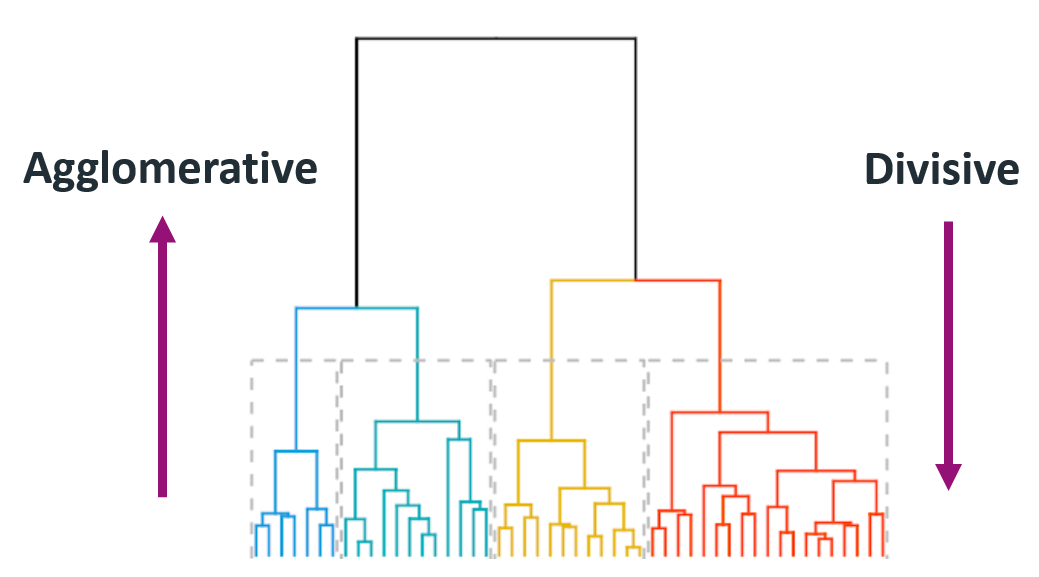

### 5.1 Ventajas y desventajas

**Ventajas:**

1. **Obtener las observaciones más similares a cualquier observación dada**: el algoritmo proporciona información detallada sobre qué observaciones son más similares entre sí.Este nivel de detalle no es proporcionado por muchos otros algoritmos. 

2. **No es tan sensible a las condiciones de inicialización**: no es sensible a las condiciones de inicialización, como las semillas establecidas o el orden del conjunto de datos.En general, debe obtener resultados muy similares y, en algunos casos, el mismo resultado exacto, si vuelve a ejecutar su análisis con diferentes condiciones de inicialización.

3. **Se puede adaptar para incorporar variables categóricas**: se puede adaptar para admitir situaciones en las que tiene una mezcla de variables numéricas y categóricas relativamente fácilmente.Para hacer esto, debe asegurarse de que está utilizando métricas de distancia que sean apropiadas para los tipos de datos mixtos, como la distancia del productor.

4. **Menos sensible a los valores atípicos**: no es probable que la presencia de algunos valores atípicos afecte la forma en que el algoritmo se desempeña en los otros puntos de datos.

5. **Suposiciones menos estrictas sobre la forma del clúster**: Los algoritmos no hacen suposiciones estrictas sobre la forma de sus clústeres.Dependiendo de la métrica de distancia que use, algunas formas de clúster pueden detectarse más fácilmente que otras, pero hay más flexibilidad.


**Desventajas:**


1. **Relativamente lento**: Es un algoritmo matemáticamente muy pesado.La agrupación jerárquica generalmente requiere calcular la distancia por pares entre todas las observaciones en un conjunto de datos, por lo que el número de cálculos requeridos crecen rápidamente a medida que aumenta el tamaño de su conjunto de datos.

2. **Se tiene que especificar el número de grupos**, pero el número de grupos se puede cambiar después de que se haya ejecutado la parte principal del algoritmo, por lo que podemos experimentar con el uso de diferentes números de clústeres sin tener que ejecutar el algoritmo desde cero.

3. **Sensible a la escala**: Es posible que necesitemos rescalar datos antes de ejecutar la agrupación.El nivel exacto de sensibilidad variará según la métrica de distancia que estamos utilizando para calcular la distancia entre los puntos.

4. **Muy guiado por la heurística**: Esto lleva a una gran intervención manual en el proceso y, en consecuencia, se requiere conocimiento específico de aplicación/dominio para analizar si el resultado tiene algún sentido o no.

5. **Posiblemente difícil de visualizar**: Si el número de muestras de datos aumenta, entonces analizar visualmente el dendrograma y tomar decisiones se vuelve imposible.

### 5.2 Variaciones de la agrupación jerárquica

**BIRCH** 
- Es una extensión de la agrupación jerárquica que se ejecuta más rápido en grandes conjuntos de datos.
- Tiene requisitos de memoria más bajos que la agrupación jerárquica estándar.

### 5.3 Entrenamiento del modelo de clúster jerárquico

In [ ]:
# copiar data sets
df_AgglomerativeC = df3.copy()
df_blob_AgglomerativeC = blob_df.copy()
df_dart_AgglomerativeC = dart_df.copy()
df_basic2_AgglomerativeC = basic2_df.copy()
df_outliers_AgglomerativeC = outliers_df.copy()
df_spiral2_AgglomerativeC = spiral2_df.copy()
df_boxes3_AgglomerativeC = boxes3_df.copy()

In [ ]:
df_blob_AgglomerativeC.drop(['color'], axis = 1, inplace =True)
df_dart_AgglomerativeC.drop(['color'], axis = 1, inplace =True)
df_basic2_AgglomerativeC.drop(['color'], axis = 1, inplace =True)
df_outliers_AgglomerativeC.drop(['color'], axis = 1, inplace =True)
df_spiral2_AgglomerativeC.drop(['color'], axis = 1, inplace =True)
df_boxes3_AgglomerativeC.drop(['color'], axis = 1, inplace =True)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Entreanr el modelo
AgglomerativeC = AgglomerativeClustering(n_clusters=6, metric = 'euclidean', linkage = 'ward')
y_AgglomerativeC = AgglomerativeC.fit_predict(df_AgglomerativeC)

AgglomerativeC_blob = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
AgglomerativeC_dart = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
AgglomerativeC_basic = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
AgglomerativeC_outliers = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
AgglomerativeC_spiral2 = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
AgglomerativeC_boxes3 = AgglomerativeClustering(n_clusters = 12, metric = 'euclidean', linkage = 'ward')

y_AgglomerativeC_blob = AgglomerativeC_blob.fit_predict(df_blob_AgglomerativeC)
y_AgglomerativeC_dart = AgglomerativeC_dart.fit_predict(df_dart_AgglomerativeC)
y_AgglomerativeC_basic = AgglomerativeC_basic.fit_predict(df_basic2_AgglomerativeC)
y_AgglomerativeC_outliers = AgglomerativeC_outliers.fit_predict(df_outliers_AgglomerativeC)
y_AgglomerativeC_spiral2 = AgglomerativeC_spiral2.fit_predict(df_spiral2_AgglomerativeC)
y_AgglomerativeC_boxes3 = AgglomerativeC_boxes3.fit_predict(df_boxes3_AgglomerativeC)

In [ ]:
# Creación de columnas 'clúster' en conjuntos de datos
df_blob_AgglomerativeC['Cluster'] = y_AgglomerativeC_blob
df_dart_AgglomerativeC['Cluster'] = y_AgglomerativeC_dart
df_basic2_AgglomerativeC['Cluster'] = y_AgglomerativeC_basic
df_outliers_AgglomerativeC['Cluster'] = y_AgglomerativeC_outliers
df_spiral2_AgglomerativeC['Cluster'] = y_AgglomerativeC_spiral2
df_boxes3_AgglomerativeC['Cluster'] = y_AgglomerativeC_boxes3

### 5.4 Comparación de resultados

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(10,30))
fig.suptitle('ANSWER vs Hierarchical clustering\n', size = 18)

axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Blob");
axes[0,1].scatter(df_blob_AgglomerativeC['x'], df_blob_AgglomerativeC['y'], c=df_blob_AgglomerativeC['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("Hierarchical clustering Blob");

axes[1,0].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer Dart");
axes[1,1].scatter(df_dart_AgglomerativeC['x'], df_dart_AgglomerativeC['y'], c=df_dart_AgglomerativeC['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("Hierarchical clustering Dart");

axes[2,0].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer Basic");
axes[2,1].scatter(df_basic2_AgglomerativeC['x'], df_basic2_AgglomerativeC['y'], c=df_basic2_AgglomerativeC['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("Hierarchical clustering Basic");

axes[3,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer Outliers");
axes[3,1].scatter(df_outliers_AgglomerativeC['x'], df_outliers_AgglomerativeC['y'], c=df_outliers_AgglomerativeC['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("Hierarchical clustering Outliers");

axes[4,0].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer Spiral");
axes[4,1].scatter(df_spiral2_AgglomerativeC['x'], df_spiral2_AgglomerativeC['y'], c=df_spiral2_AgglomerativeC['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("Hierarchical clustering Spiral");

axes[5,0].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer Boxes");
axes[5,1].scatter(df_boxes3_AgglomerativeC['x'], df_boxes3_AgglomerativeC['y'], c=df_boxes3_AgglomerativeC['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("Hierarchical clustering Boxes");

plt.tight_layout()

### 5.5 Agrupación jerárquica en datos minoristas en línea

In [ ]:
df_AgglomerativeC = df2.copy()
# Verificación del número de elementos en clústeres y creación de la columna 'clúster'
df_AgglomerativeC['Cluster'] = y_AgglomerativeC
df_AgglomerativeC['Cluster'].value_counts()

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df_AgglomerativeC, x='Amount', y='Frequency', hue = 'Cluster', s=15, palette="Set3")

# 6. DBSCAN  <a class="anchor" id="6"></a>
> DBSCAN = density-based spatial clustering of applications with noise. 
- Es un algoritmo de agrupación basado en densidad.
- Es capaz de encontrar grupos de forma irregular. 
- Separa regiones por áreas de baja densidad para que también pueda detectar valores atípicos realmente bien. 
- Este algoritmo es mejor que K-means cuando se trata de trabajar con datos de forma extraña.

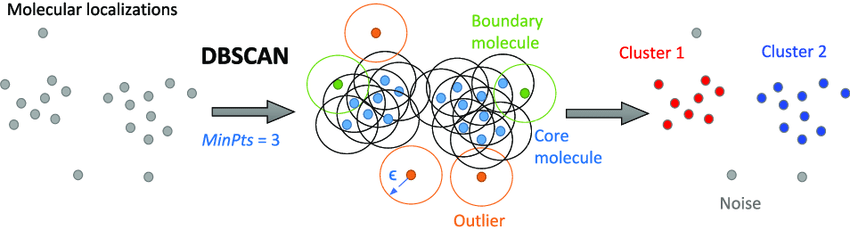

### 6.1 Ventajas y desventajas de DBSCAN

**Ventajas:**
1. **Maneja grupos de forma irregular y tamaño** - DBSCAN es uno de los algoritmos que hace la menor cantidad de suposiciones sobre la forma de los grupos. Eso significa que DBSCAN puede usarse para detectar grupos que tienen forma de extraña o irregularmente.

2. **Robusto para los valores atípicos** - El algoritmo es capaz de detectar valores atípicos y excluirlos por completo de los grupos. 

3. **No requiere que se especifique el número de grupos **; otra ventaja es que no requiere que el usuario especifique el número de grupos. DBSCAN puede detectar automáticamente el número de grupos que existen en los datos.Esto es ideal para los casos en que no tiene mucha intuición sobre cuántos grupos debería haber.

4. **Menos sensible a las condiciones de inicialización** - DBSCAN es menos sensible a las condiciones de inicialización como el orden de las observaciones en el conjunto de datos y la semilla que se usa que otros algoritmos de agrupación.

5. **Relativamente rápido** - DBSCAN es generalmente más lento que la agrupación de K-Means, pero más rápido que la agrupación jerárquica y la agrupación espectral.


**Desventajas:**
1. **Difícil de incorporar características categóricas** - Debe usar DBSCAN en los casos en que la mayoría de sus características son numéricas.

2. **Requiere una caída en la densidad para detectar bordes de clúster**: debe haber una caída en la densidad de los puntos de datos entre clústeres para que el algoritmo pueda detectar los límites entre los grupos.Si hay múltiples grupos que se superponen sin una caída de la densidad de datos entre ellos, pueden agruparse en un solo clúster.

3. **Las luchas con grupos de densidad variable** - DBSCAN determina dónde comienzan los grupos y se detienen mirando lugares donde la densidad de puntos de datos cae por debajo de cierto umbral.Puede ser difícil encontrar un umbral que capture todos los puntos en el clúster menos denso sin excluir demasiados valores atípicos extraños en el grupo más denso.

4. **Sensible a la escala** - DBSCAN es sensible a la escala de variables.Eso significa que necesitamos rescalar variables si están en escalas muy diferentes.

5. **Las luchas con datos de alta dimensión** - El rendimiento de DBSCAN tiende a degradarse en situaciones donde hay muchas características.Deberíamos usar técnicas de reducción de dimensionalidad o selección de características para reducir el número de características si tenemos un conjunto de datos de alta dimensión.

6. **Necesidad de configurar los parámetros para Epsilon y MinPts**. Esto podría ser complicado.

### 6.2 Elegir los parámetros iniciales correctos

DBSCAN requiere dos parámetros -  elegir los números correctos es fundamental para este algoritmo.

1. **Epsilon (ε)** es el radio del círculo que se creará alrededor de cada punto de datos para verificar la densidad.
    - Esta técnica calcula la distancia promedio entre cada punto y sus k vecinos más cercanos, donde k = el valor de los Mints que seleccionó.Las distancias K promedio se trazan en orden ascendente en un gráfico K-Distance. 
    - El valor de Epsilon se puede decidir a partir del gráfico K-distance. 
    - El punto de curvatura máxima (codo) en este gráfico nos dice sobre el valor de Epsilon (es decir, donde el gráfico tiene la mayor pendiente).


2. **MinPoints (MinPts)** es el número mínimo de puntos de datos requeridos dentro de ese círculo para que ese punto de datos se clasifique como un punto central.
    - No existe una forma automática de determinar el valor de los MinPts para DBSCAN.
    - No tiene sentido tomar Minpoints como 1 porque dará como resultado que cada punto sea un clúster separado.
    - Por tanto, debe ser al menos 3. 
    - Generalmente, es el doble de las dimensiones o dimensiones +1.
    - El conocimiento del dominio también decide su valor.



* Si el conjunto de datos es más ruidoso, elegit un valor más grande de los MinPts
* Para datos bidimensionales, usar el valor predeterminado de DBSCAN de MinPts = 4 (Ester et al., 1996).


El valor de los puntos mínimos debe ser al menos uno mayor que el número de dimensiones del conjunto de datos:

* MinPts> = Dimensions * 2

O

* MinPts> = Dimensions + 1

**IMPORTANTE:**

A veces es difícil encontrar parámetros adecuados de Epsilon y MinPts para el conjunto de datos. Estas son algunos tips:

1. Usar un MinPts más grande para conjuntos de datos grandes y ruidosos.

2. Si se obtienen grupos demasiado grandes: disminuir Epsilon.

3. Si se obtiene demasiado ruido: aumenta Epsilon.

4. La buena agrupación requiere iteraciones.

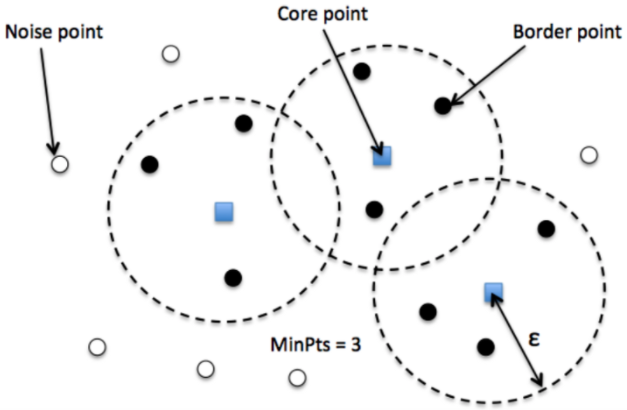

Para trazar un gráfico K-Distance, necesitamos una distancia entre un punto y su punto de datos más cercano para todos los puntos de datos en el conjunto de datos.

Lo obtenemos usando los `NearestNeighbors`.

In [ ]:
# copiar
df_DBScan = df3.copy()
df_blob_DBScan = blob_df.copy()
df_dart_DBScan = dart_df.copy()
df_basic2_DBScan = basic2_df.copy()
df_outliers_DBScan = outliers_df.copy()
df_spiral2_DBScan = spiral2_df.copy()
df_boxes3_DBScan = boxes3_df.copy()

In [ ]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=4)
nbrs = nn.fit(df_dart_DBScan)
distances, indices = nbrs.kneighbors(df_dart_DBScan)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(6,6))
plt.plot(distances)
plt.title('K-distance Graph for "Dart df"',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

1. El valor óptimo de Epsilon está en el punto de curvatura máxima en el gráfico K-Distance, que es 8 en este caso.
2. Para los MinPts, elegiremos 4 (2 * dimensiones)

### 6.3 Variaciones de DBSCAN

**Generalized DBSCAN (GDBSCAN)** - Los parámetros ε y minPts se eliminan del algoritmo original y se trasladan a los predicados.

**OPTICS (Ordering Points To Identify the Clustering Structure)** - Encuentra una muestra central de alta densidad y expande grupos de ellos. A diferencia de DBSCAN, mantiene la jerarquía de clúster para un radio variable del vecindario. Más adecuado para su uso en grandes conjuntos de datos que la implementación actual de Sklearn de DBSCAN.

**HDBSCAN** - Versión jerárquica de DBSCAN que también es más rápida que OPTICS, de lo cual se puede extraer una partición plana que consiste en los grupos más prominentes de la jerarquía.

DBSCAN también se usa como parte de algoritmos de agrupación de subespacios, como PreDeCon and SUBCLU. 

### 6.4 Entrenamiento de DBSCAN

In [ ]:
df_blob_DBScan.drop(['color'], axis = 1, inplace =True)
df_dart_DBScan.drop(['color'], axis = 1, inplace =True)
df_basic2_DBScan.drop(['color'], axis = 1, inplace =True)
df_outliers_DBScan.drop(['color'], axis = 1, inplace =True)
df_spiral2_DBScan.drop(['color'], axis = 1, inplace =True)
df_boxes3_DBScan.drop(['color'], axis = 1, inplace =True)

In [ ]:
# Entrenar
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=20, min_samples=9, metric='euclidean')
y_DBScan = dbscan.fit_predict(df_DBScan)

DBScan_blob = DBSCAN(eps=13, min_samples=45, metric='euclidean')
DBScan_dart = DBSCAN(eps=8, min_samples=4, metric='euclidean')
DBScan_basic = DBSCAN(eps=15, min_samples=4, metric='euclidean')
DBScan_outliers = DBSCAN(eps=20, min_samples=4, metric='euclidean')
DBScan_spiral2 = DBSCAN(eps=5.7, min_samples=4, metric='euclidean')
DBScan_boxes3 = DBSCAN(eps=6, min_samples=4, metric='euclidean')

y_DBScan_blob = DBScan_blob.fit_predict(df_blob_DBScan)
y_DBScan_dart = DBScan_dart.fit_predict(df_dart_DBScan)
y_DBScan_basic = DBScan_basic.fit_predict(df_basic2_DBScan)
y_DBScan_outliers = DBScan_outliers.fit_predict(df_outliers_DBScan)
y_DBScan_spiral2 = DBScan_spiral2.fit_predict(df_spiral2_DBScan)
y_DBScan_boxes3 = DBScan_boxes3.fit_predict(df_boxes3_DBScan)

In [ ]:
# Creación de columnas 'clúster' en conjuntos de datos
df_blob_DBScan['Cluster'] = y_DBScan_blob
df_dart_DBScan['Cluster'] = y_DBScan_dart
df_basic2_DBScan['Cluster'] = y_DBScan_basic
df_outliers_DBScan['Cluster'] = y_DBScan_outliers
df_spiral2_DBScan['Cluster'] = y_DBScan_spiral2
df_boxes3_DBScan['Cluster'] = y_DBScan_boxes3

### 6.5 Comparación de resultados

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(10,30))
fig.suptitle('ANSWER vs DBSCAN clustering\n', size = 18)

axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Blob");
axes[0,1].scatter(df_blob_DBScan['x'], df_blob_DBScan['y'], c=df_blob_DBScan['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("DBSCAN clustering Blob");

axes[1,0].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer Dart");
axes[1,1].scatter(df_dart_DBScan['x'], df_dart_DBScan['y'], c=df_dart_DBScan['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("DBSCAN clustering Dart");

axes[2,0].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer Basic");
axes[2,1].scatter(df_basic2_DBScan['x'], df_basic2_DBScan['y'], c=df_basic2_DBScan['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("DBSCAN clustering Basic");

axes[3,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer Outliers");
axes[3,1].scatter(df_outliers_DBScan['x'], df_outliers_DBScan['y'], c=df_outliers_DBScan['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("DBSCAN clustering Outliers");

axes[4,0].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer Spiral");
axes[4,1].scatter(df_spiral2_DBScan['x'], df_spiral2_DBScan['y'], c=df_spiral2_DBScan['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("DBSCAN clustering Spiral");

axes[5,0].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer Boxes");
axes[5,1].scatter(df_boxes3_DBScan['x'], df_boxes3_DBScan['y'], c=df_boxes3_DBScan['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("DBSCAN clustering Boxes");

plt.tight_layout()

### 6.6 DBSCAN en datos minoristas en línea

In [ ]:
df_DBScan = df2.copy()
# Verificación del número de elementos en clústeres y creación de la columna 'clúster'
df_DBScan['Cluster'] = y_DBScan
df_DBScan['Cluster'].value_counts()

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df_DBScan, x='Amount', y='Frequency', hue = 'Cluster', s=15, palette="Set3")

# 7. Gaussian Mixture Models (GMM)  <a class="anchor" id="7"></a>
A Gaussian mixture model (GMM) intenta encontrar una mezcla de distribuciones de probabilidad gaussianas multidimensionales que mejor modelen cualquier conjunto de datos de entrada.
- En el caso más simple, los GMM se pueden usar para encontrar grupos de la misma manera que K-means, pero debido a que GMM contiene un modelo probabilístico debajo del capó, también es posible encontrar asignaciones probabilísticas de clúster.
- Utiliza múltiples distribuciones gaussianas para adaptarse a datos de forma arbitraria.
- Hay varios modelos gaussianos individuales que actúan como capas ocultas en este modelo híbrido.
- El modelo calcula la probabilidad de que un punto de datos pertenezca a una distribución gaussiana específica y ese es el clúster en el que se caerá.

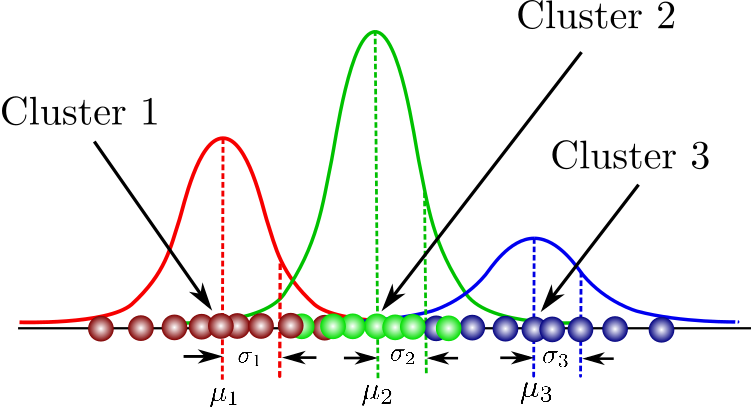

### 7.1 Ventajas y desventajas

**Ventajas:**
1. **Estimaciones probabilísticas de pertenencia a cada grupo** - Los modelos proporcionan estimaciones de la probabilidad de que cada punto de datos pertenezca a cada clúster. Estas estimaciones de probabilidad pueden ser muy útiles al examinar puntos de datos ambiguos que caen en el borde de dos grupos.

2. **No asume los grupos esféricos** - El modelo no asume que todos los grupos son esferas de forma uniforme. En cambio, se pueden usar modelos de mezcla gaussianos para acomodar grupos de formas variables.

3. **Maneja los grupos de diferentes tamaños** se pueden usar para acomodar grupos de tamaños variables.

4. **Menos sensible a la escala** - significa que es posible que no necesite rescalar sus variables antes de usarlas para la agrupación.

5. **Acomoda la membresía mixta** - En Kmeans, un punto pertenece a un solo grupo, mientras que en GMM un punto pertenece a cada clúster en un grado diferente. El grado se basa en la probabilidad de que se genere el punto a partir de la distribución normal (multivariante) de cada grupo, con el centro de clúster como la media de la distribución y la covarianza de clúster como su covarianza. Dependiendo de la tarea, la membresía mixta puede ser más apropiada (por ejemplo, los artículos de noticias pueden pertenecer a múltiples grupos de temas) o no (por ejemplo, los organismos pueden pertenecer a una sola especie).


**Desventajas:**
1. **Difícil de incorporar características categóricas** - Los modelos funcionan bajo el supuesto de que todas sus características se distribuyen normalmente, por lo que no se adaptan fácilmente a datos categóricos.

2. **Asume una distribución normal para las características** - significa que debe tomarse un tiempo para ver las distribuciones de características antes de alcanzar este algoritmo de agrupación.

3. **Haga algunas suposiciones sobre la forma del clúster** - significa que los modelos de mezcla gaussianos no funcionarán tan bien en los casos en que los clústeres tienen una forma muy irregular.

4. **Necesita datos suficientes para cada clúster**: debe asegurarse de tener suficientes puntos de datos en cada clúster para estimar adecuadamente la covarianza. La cantidad de datos requeridos no es enorme, pero es más grande que los algoritmos simples que no estiman una matriz de covarianza.

5. **Necesito especificar el número de grupos**, dado que los modelos de mezcla gaussianos funcionan bajo el supuesto de que sus características se distribuyen normalmente, los casos pueden ser expulsados ​​por casos donde hay muchos valores atípicos en los datos. Algunas implementaciones de modelos de mezcla gaussianas permiten que los valores atípicos se separen en un clúster separado.

6. **Sensible a las condiciones de inicialización** - como la semilla que se usa y los puntos de partida que se usan para los centros de clúster. Esto significa que puede obtener diferentes resultados si ejecuta el algoritmo varias veces.

7. **Lento** - Esto es especialmente cierto cuando hay muchas características en su conjunto de datos.

### 7.2 Variaciones de GMM

 **Variational Bayesian Gaussian mixture** 
 - Evita la especificación del número de componentes para un modelo de mezcla gaussiana.

### 7.3 Entrenamiento de GMM

In [ ]:
# Copiar
df_GMM = df3.copy()
df_blob_GMM = blob_df.copy()
df_dart_GMM = dart_df.copy()
df_basic2_GMM = basic2_df.copy()
df_outliers_GMM = outliers_df.copy()
df_spiral2_GMM = spiral2_df.copy()
df_boxes3_GMM = boxes3_df.copy()

In [ ]:
df_blob_GMM.drop(['color'], axis = 1, inplace =True)
df_dart_GMM.drop(['color'], axis = 1, inplace =True)
df_basic2_GMM.drop(['color'], axis = 1, inplace =True)
df_outliers_GMM.drop(['color'], axis = 1, inplace =True)
df_spiral2_GMM.drop(['color'], axis = 1, inplace =True)
df_boxes3_GMM.drop(['color'], axis = 1, inplace =True)

In [ ]:
# Entrenar
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=8)
y_GMM = gmm.fit_predict(df_GMM)

GMM_blob = GaussianMixture(n_components=4)
GMM_dart = GaussianMixture(n_components=2)
GMM_basic = GaussianMixture(n_components=5)
GMM_outliers = GaussianMixture(n_components=3)
GMM_spiral2 = GaussianMixture(n_components=2)
GMM_boxes3 = GaussianMixture(n_components=12)

y_GMM_blob = GMM_blob.fit_predict(df_blob_GMM)
y_GMM_dart = GMM_dart.fit_predict(df_dart_GMM)
y_GMM_basic = GMM_basic.fit_predict(df_basic2_GMM)
y_GMM_outliers = GMM_outliers.fit_predict(df_outliers_GMM)
y_GMM_spiral2 = GMM_spiral2.fit_predict(df_spiral2_GMM)
y_GMM_boxes3 = GMM_boxes3.fit_predict(df_boxes3_GMM)

In [ ]:
# Creación de columnas 'clúster' en conjuntos de datos
df_blob_GMM['Cluster'] = y_GMM_blob
df_dart_GMM['Cluster'] = y_GMM_dart
df_basic2_GMM['Cluster'] = y_GMM_basic
df_outliers_GMM['Cluster'] = y_GMM_outliers
df_spiral2_GMM['Cluster'] = y_GMM_spiral2
df_boxes3_GMM['Cluster'] = y_GMM_boxes3

### 7.4 Comparación de resultados

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(10,30))
fig.suptitle('ANSWER vs GMM clustering\n', size = 18)

axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Blob");
axes[0,1].scatter(df_blob_GMM['x'], df_blob_GMM['y'], c=df_blob_GMM['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("GMM clustering Blob");

axes[1,0].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer Dart");
axes[1,1].scatter(df_dart_GMM['x'], df_dart_GMM['y'], c=df_dart_GMM['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("GMM clustering Dart");

axes[2,0].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer Basic");
axes[2,1].scatter(df_basic2_GMM['x'], df_basic2_GMM['y'], c=df_basic2_GMM['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("GMM clustering Basic");

axes[3,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer Outliers");
axes[3,1].scatter(df_outliers_GMM['x'], df_outliers_GMM['y'], c=df_outliers_GMM['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("GMM clustering Outliers");

axes[4,0].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer Spiral");
axes[4,1].scatter(df_spiral2_GMM['x'], df_spiral2_GMM['y'], c=df_spiral2_GMM['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("GMM clustering Spiral");

axes[5,0].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer Boxes");
axes[5,1].scatter(df_boxes3_GMM['x'], df_boxes3_GMM['y'], c=df_boxes3_GMM['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("GMM clustering Boxes");

plt.tight_layout()

### 7.5 GMM en datos minoristas en línea

In [ ]:
df_GMM = df2.copy()
# Comprobación del número de elementos en clústeres y creando columna 'clúster'
df_GMM['Cluster'] = y_GMM
df_GMM['Cluster'].value_counts()

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df_GMM, x='Amount', y='Frequency', hue = 'Cluster', s=15, palette="Set3")

# 8. Comparación de todos los algoritmos  <a class="anchor" id="8"></a>

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(30,30))
fig.suptitle('ANSWER vs different algorithm\n', size = 18)

axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Blob");
axes[0,1].scatter(df_blob_GMM['x'], df_blob_GMM['y'], c=df_blob_GMM['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("GMM clustering Blob");
axes[0,2].scatter(df_blob_kmeans['x'], df_blob_kmeans['y'], c=df_blob_kmeans['Cluster'], s=10, cmap = "Set3")
axes[0,2].set_title("K-Means Blob");
axes[0,3].scatter(df_blob_AgglomerativeC['x'], df_blob_AgglomerativeC['y'], c=df_blob_AgglomerativeC['Cluster'], s=10, cmap = "Set3")
axes[0,3].set_title("Hierarchical clustering Blob");
axes[0,4].scatter(df_blob_DBScan['x'], df_blob_DBScan['y'], c=df_blob_DBScan['Cluster'], s=10, cmap = "Set3")
axes[0,4].set_title("DBSCAN clustering Blob");

axes[1,0].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer Dart");
axes[1,1].scatter(df_dart_GMM['x'], df_dart_GMM['y'], c=df_dart_GMM['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("GMM clustering Dart");
axes[1,2].scatter(df_dart_kmeans['x'], df_dart_kmeans['y'], c=df_dart_kmeans['Cluster'], s=10, cmap = "Set3")
axes[1,2].set_title("K-Means Dart");
axes[1,3].scatter(df_dart_AgglomerativeC['x'], df_dart_AgglomerativeC['y'], c=df_dart_AgglomerativeC['Cluster'], s=10, cmap = "Set3")
axes[1,3].set_title("Hierarchical clustering Dart");
axes[1,4].scatter(df_dart_DBScan['x'], df_dart_DBScan['y'], c=df_dart_DBScan['Cluster'], s=10, cmap = "Set3")
axes[1,4].set_title("DBSCAN clustering Dart");

axes[2,0].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer Basic");
axes[2,1].scatter(df_basic2_GMM['x'], df_basic2_GMM['y'], c=df_basic2_GMM['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("GMM clustering Basic");
axes[2,2].scatter(df_basic_kmeans['x'], df_basic_kmeans['y'], c=df_basic_kmeans['Cluster'], s=10, cmap = "Set3")
axes[2,2].set_title("K-Means Basic");
axes[2,3].scatter(df_basic2_AgglomerativeC['x'], df_basic2_AgglomerativeC['y'], c=df_basic2_AgglomerativeC['Cluster'], s=10, cmap = "Set3")
axes[2,3].set_title("Hierarchical clustering Basic");
axes[2,4].scatter(df_basic2_DBScan['x'], df_basic2_DBScan['y'], c=df_basic2_DBScan['Cluster'], s=10, cmap = "Set3")
axes[2,4].set_title("DBSCAN clustering Basic");

axes[3,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer Outliers");
axes[3,1].scatter(df_outliers_GMM['x'], df_outliers_GMM['y'], c=df_outliers_GMM['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("GMM clustering Outliers");
axes[3,2].scatter(df_outliers_kmeans['x'], df_outliers_kmeans['y'], c=df_outliers_kmeans['Cluster'], s=10, cmap = "Set3")
axes[3,2].set_title("K-Means Outliers");
axes[3,3].scatter(df_outliers_AgglomerativeC['x'], df_outliers_AgglomerativeC['y'], c=df_outliers_AgglomerativeC['Cluster'], s=10, cmap = "Set3")
axes[3,3].set_title("Hierarchical clustering Outliers");
axes[3,4].scatter(df_outliers_DBScan['x'], df_outliers_DBScan['y'], c=df_outliers_DBScan['Cluster'], s=10, cmap = "Set3")
axes[3,4].set_title("DBSCAN clustering Outliers");

axes[4,0].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer Spiral");
axes[4,1].scatter(df_spiral2_GMM['x'], df_spiral2_GMM['y'], c=df_spiral2_GMM['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("GMM clustering Spiral");
axes[4,2].scatter(df_spiral2_kmeans['x'], df_spiral2_kmeans['y'], c=df_spiral2_kmeans['Cluster'], s=10, cmap = "Set3")
axes[4,2].set_title("K-Means Spiral");
axes[4,3].scatter(df_spiral2_AgglomerativeC['x'], df_spiral2_AgglomerativeC['y'], c=df_spiral2_AgglomerativeC['Cluster'], s=10, cmap = "Set3")
axes[4,3].set_title("Hierarchical clustering Spiral");
axes[4,4].scatter(df_spiral2_DBScan['x'], df_spiral2_DBScan['y'], c=df_spiral2_DBScan['Cluster'], s=10, cmap = "Set3")
axes[4,4].set_title("DBSCAN clustering Spiral");

axes[5,0].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer Boxes");
axes[5,1].scatter(df_boxes3_GMM['x'], df_boxes3_GMM['y'], c=df_boxes3_GMM['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("GMM clustering Boxes");
axes[5,2].scatter(df_boxes3_kmeans['x'], df_boxes3_kmeans['y'], c=df_boxes3_kmeans['Cluster'], s=10, cmap = "Set3")
axes[5,2].set_title("K-Means Boxes");
axes[5,3].scatter(df_boxes3_AgglomerativeC['x'], df_boxes3_AgglomerativeC['y'], c=df_boxes3_AgglomerativeC['Cluster'], s=10, cmap = "Set3")
axes[5,3].set_title("Hierarchical clustering Boxes");
axes[5,4].scatter(df_boxes3_DBScan['x'], df_boxes3_DBScan['y'], c=df_boxes3_DBScan['Cluster'], s=10, cmap = "Set3")
axes[5,4].set_title("DBSCAN clustering Boxes");

plt.tight_layout()

### Referencias

https://crunchingthedata.com/when-to-use-dbscan/

https://crunchingthedata.com/when-to-use-hierarchical-clustering/

https://crunchingthedata.com/when-to-use-gaussian-mixture-models/

https://www.freecodecamp.org/news/8-clustering-algorithms-in-machine-learning-that-all-data-scientists-should-know/

## Ejercicio
El dataset del Titanic contiene información sobre los pasajeros del Titanic, incluyendo características como la edad (Age), el precio del billete (Fare), la clase del pasajero (Pclass), y si sobrevivieron (Survived). 

El objetivo es agrupar a los pasajeros en clústeres basados en estas características utilizando un algoritmo de clustering.

- Preprocesar los datos para manejar valores faltantes y normalizar las características.
- Aplicar un algoritmo de clustering (K-Means o DBSCAN).
- Evaluar la calidad del clustering utilizando métricas como el Silhouette Score .
- Visualizar los resultados para interpretar los clústeres.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Cargar el dataset del Titanic
df = pd.read_csv('../../../data/titanic/train.csv')

# Mostrar las primeras filas
print(df.head())

In [ ]:
# Eliminar filas con valores faltantes en las columnas relevantes
df_clean = df[['Age', 'Fare', 'Pclass', 'Survived']].dropna()

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

## K-Means

In [ ]:
# Método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('El método del Codo')
plt.xlabel('Número de grupos')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Aplicar K-Means
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(X_scaled)

# Evaluar el Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df_clean['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

In [ ]:
# Visualizar clústeres
plt.scatter(df_clean['Age'], df_clean['Fare'], c=df_clean['Cluster'], cmap='viridis')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.title('Clustering de Pasajeros del Titanic')
plt.show()

## DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=4)
nbrs = nn.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(6,6))
plt.plot(distances)
plt.title('K-distance Graph for "X"',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
# Entrenar DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
df_clean['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

# Evaluación: Contar puntos en cada clúster
print(df_clean['Cluster_DBSCAN'].value_counts())

# Evaluar el Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df_clean['Cluster_DBSCAN'])
print(f"Silhouette Score: {silhouette_avg}")

# Visualizar clústeres
plt.scatter(df_clean['Age'], df_clean['Fare'], c=df_clean['Cluster_DBSCAN'], cmap='viridis')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.title('Clustering de Pasajeros del Titanic')
plt.show()